In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway # ANOVA : Numeric vs Categorical (2 or more categories)
from scipy.stats import kruskal # If anova doesn't hold use Kruskal
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt 
from scipy.stats import shapiro
from scipy.stats import levene

In [50]:
df = pd.read_csv("./LECTURE NOTES/aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

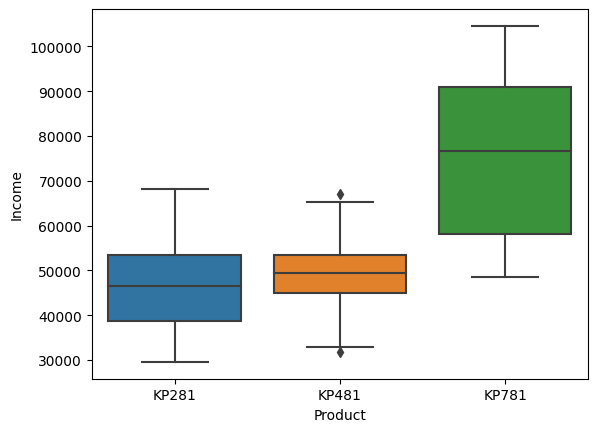

In [10]:
sns.boxplot(data=df,x="Product",y="Income")

In [18]:
#Assigning random groups to each row
df["random_group"] = np.random.choice(['g1','g2','g3'],size=len(df))
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g2
1,KP281,19,Male,15,Single,2,3,31836,75,g3
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,g2
176,KP781,42,Male,18,Single,5,4,89641,200,g1
177,KP781,45,Male,16,Single,5,5,90886,160,g2
178,KP781,47,Male,18,Partnered,4,5,104581,120,g2


<Axes: xlabel='random_group', ylabel='Income'>

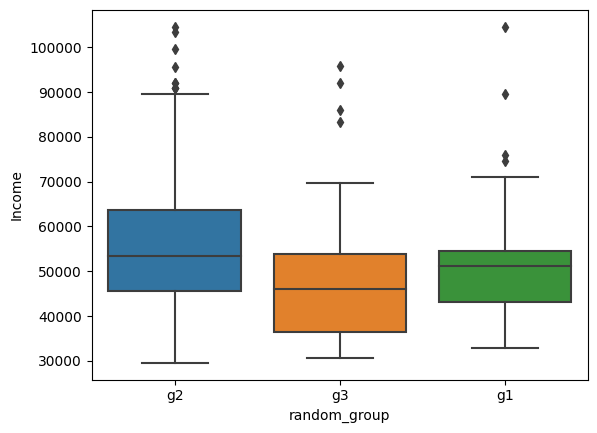

In [19]:
sns.boxplot(data=df,x="random_group",y="Income")

In [31]:
income_g1= df[df["random_group"] == "g1"]["Income"]
income_g2= df[df["random_group"] == "g2"]["Income"]
income_g3= df[df["random_group"] == "g3"]["Income"]


income_g1_mean = df[df["random_group"] == "g1"]["Income"].mean()
income_g2_mean = df[df["random_group"] == "g2"]["Income"].mean()
income_g3_mean = df[df["random_group"] == "g3"]["Income"].mean()
income_g1_mean,income_g2_mean,income_g3_mean

(52256.52830188679, 58474.0, 49076.32142857143)

In [34]:
income_KP281 = df[df["Product"] == "KP281"]["Income"]
income_KP481 = df[df["Product"] == "KP481"]["Income"]
income_KP781 = df[df["Product"] == "KP781"]["Income"]

income_KP281_mean = df[df["Product"] == "KP281"]["Income"].mean()
income_KP481_mean = df[df["Product"] == "KP481"]["Income"].mean()
income_KP781_mean = df[df["Product"] == "KP781"]["Income"].mean()
income_KP281_mean,income_KP481_mean,income_KP781_mean

(46418.025, 48973.65, 75441.575)

#### AS WE SEE FROM THE ABOVE THE GROUPS ASSIGNED HAVE A DIFFERENT MEAN ALTOGETER

In [33]:
f_oneway(income_g1,income_g2,income_g3) # p-value is fairly low

F_onewayResult(statistic=5.647672932793219, pvalue=0.0041911262856557975)

* Here we notice f_statistic in random grouped data is quite low as compared to f_statistic in grouped data

In [35]:
f_oneway(income_KP281,income_KP481,income_KP781) # p-value is very very low -> Reject null H0

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [39]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_KP281, income_KP481)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Fail to reject H0


In [38]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_KP481, income_KP781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

7.770191623361236e-16
Reject H0


In [37]:
# Try pairwise T-tests for fun
# H0: Two means are same
t_stat, p_value = ttest_ind(income_KP281, income_KP781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

4.116508528877672e-21
Reject H0


# Problems with this
* If there are n groups , we need to take nc2 tests 
* Each test may have 5% error -> This will not always work

## ASSUMPTION
* Relies on the data being gaussian
* 

# Height and weight

In [78]:
df_hw = pd.read_csv("./LECTURE NOTES/weight-height.csv")
df_height = df_hw["Height"]
df_weight = df_hw["Weight"]

<Axes: xlabel='Height', ylabel='Count'>

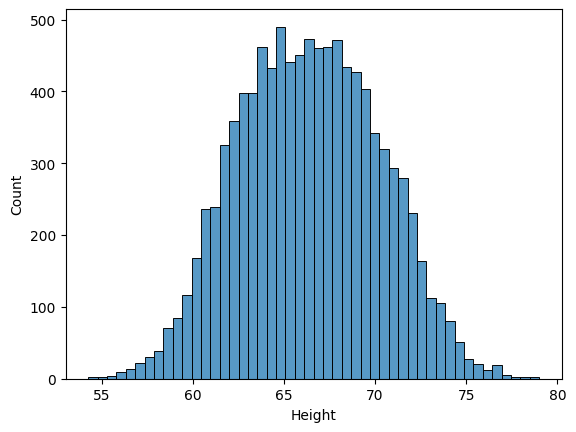

In [52]:
sns.histplot(data=df_height)

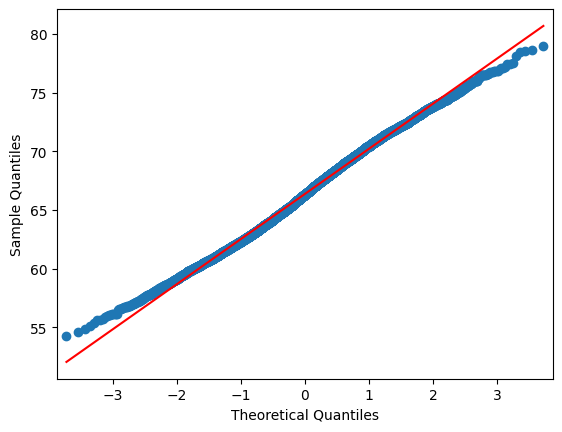

In [60]:
qqplot(df_height,line="s")
plt.show()

<Axes: ylabel='Count'>

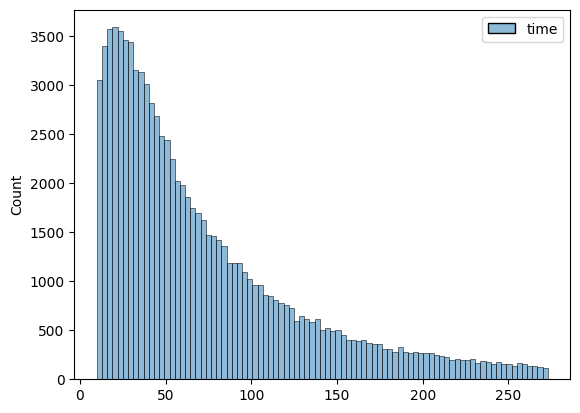

In [62]:
df_waiting = pd .read_csv("./LECTURE NOTES/waiting_time.csv")
sns.histplot(df_waiting)

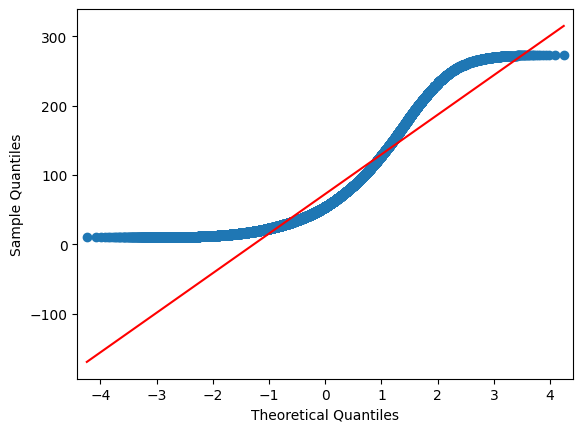

In [67]:
qqplot(df_waiting["time"], line="s")
plt.show()

### Shapiro for Gaussian

In [74]:
df_height = df_height.sample(100) #50 to 100 samples

In [76]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(df_height)
print(p_value)

0.23725929856300354


In [80]:
df_wt_subset = df_waiting.sample(50)["time"]

In [81]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)

0.00013651461631525308


<Axes: xlabel='Height', ylabel='Count'>

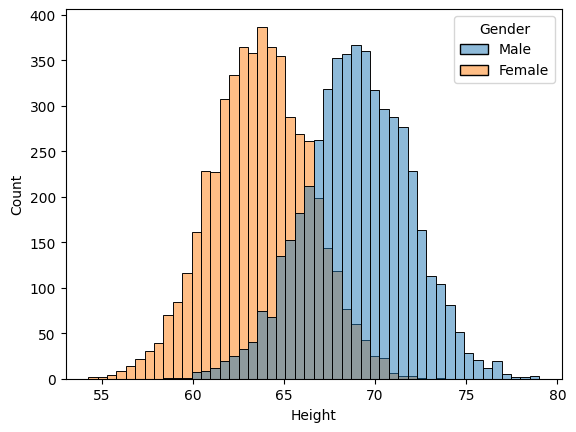

In [83]:
sns.histplot(data=df_hw,x="Height",hue="Gender")

In [84]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [85]:
height_men.mean()

69.02634590621741

In [86]:
height_women.mean()

63.70877360342507

In [87]:
ttest_ind(height_men,height_women)

Ttest_indResult(statistic=95.60271449148823, pvalue=0.0)

In [88]:
height_men.std()

2.863362228660647

In [91]:
height_women.std()

2.6962840157650536

IS the height difference statistically significant or not?

In [93]:
# Ho : Variance are equal
# Ha : Variance is not equal
levene(height_men,height_women)

LeveneResult(statistic=12.284910854677701, pvalue=0.0004586349895436178)

Small p-value reject null H0